In [1]:
import numpy as np
from sklearn import datasets
from itertools import combinations,permutations
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib widget

In [2]:
class LinearRegression:
    
    def __init__(self,learning_rate=0.0001,n=100):
        self.epochs = n
        self.lr = learning_rate
        self.w = None
        self.b = None
        self.cost_list = []
        
    def initiate_params(self,shape):
        self.w = np.zeros(shape)
        self.b = 0
        return True
    
    def lst_sq(self, predictions, target):
        return 0.5 * np.sum((predictions - target)**2)

    def predict(self,input_data):
        return np.dot(input_data, self.w) + self.b
    
    def update_parameters(self,dw,db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
        return True
    
    def gradient_descent(self,X,y,y_pred,regularization):
        error = y_pred - y
        cost = self.lst_sq(y_pred,y) 
        dw = (1 / X.shape[0]) * np.dot(X.T,error) + (0.5 * regularization) * self.w
        db = (1 / X.shape[0]) * np.sum(error)
        return dw, db,cost
    
    def create_batches(self, X, y, batch_size):
        mini_batches = []
        data = np.hstack((X, y.reshape(-1,1)))
        np.random.shuffle(data)
        n_minibatches = data.shape[0] // batch_size
        i = 0
        for i in range(n_minibatches + 1):
            mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((1, -1))[0]
            mini_batches.append((X_mini, Y_mini))
        if data.shape[0] % batch_size != 0:
            mini_batch = data[i * batch_size:data.shape[0]]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((1, -1))[0]
            mini_batches.append((X_mini, Y_mini))
        return mini_batches

    def fit(self, input_data , target_values , batch_size = 32, regularization = 0):
        self.initiate_params(input_data.shape[1])
        for _ in range(self.epochs):
            mini_batches = self.create_batches(input_data, target_values, batch_size)
            loss_list = []
            for batch in mini_batches:
                X_mini, y_mini = batch
                predicted_values = self.predict(X_mini)
                dw, db, loss = self.gradient_descent(X_mini, y_mini, predicted_values,regularization)
                loss_list.append(loss)
                self.update_parameters(dw, db)
            avg_loss = np.array(loss_list).mean()
            self.cost_list.append(avg_loss)
        return self               

# Preparing the Data

In [3]:
iris_dataset = datasets.load_iris()
x = iris_dataset.data
y = iris_dataset.target
feature_names = iris_dataset.feature_names
target_classes = iris_dataset.target_names
train_split,test_split,train_y_split,test_y_split = train_test_split(x,y,test_size=0.1)

# Training all the 12 models

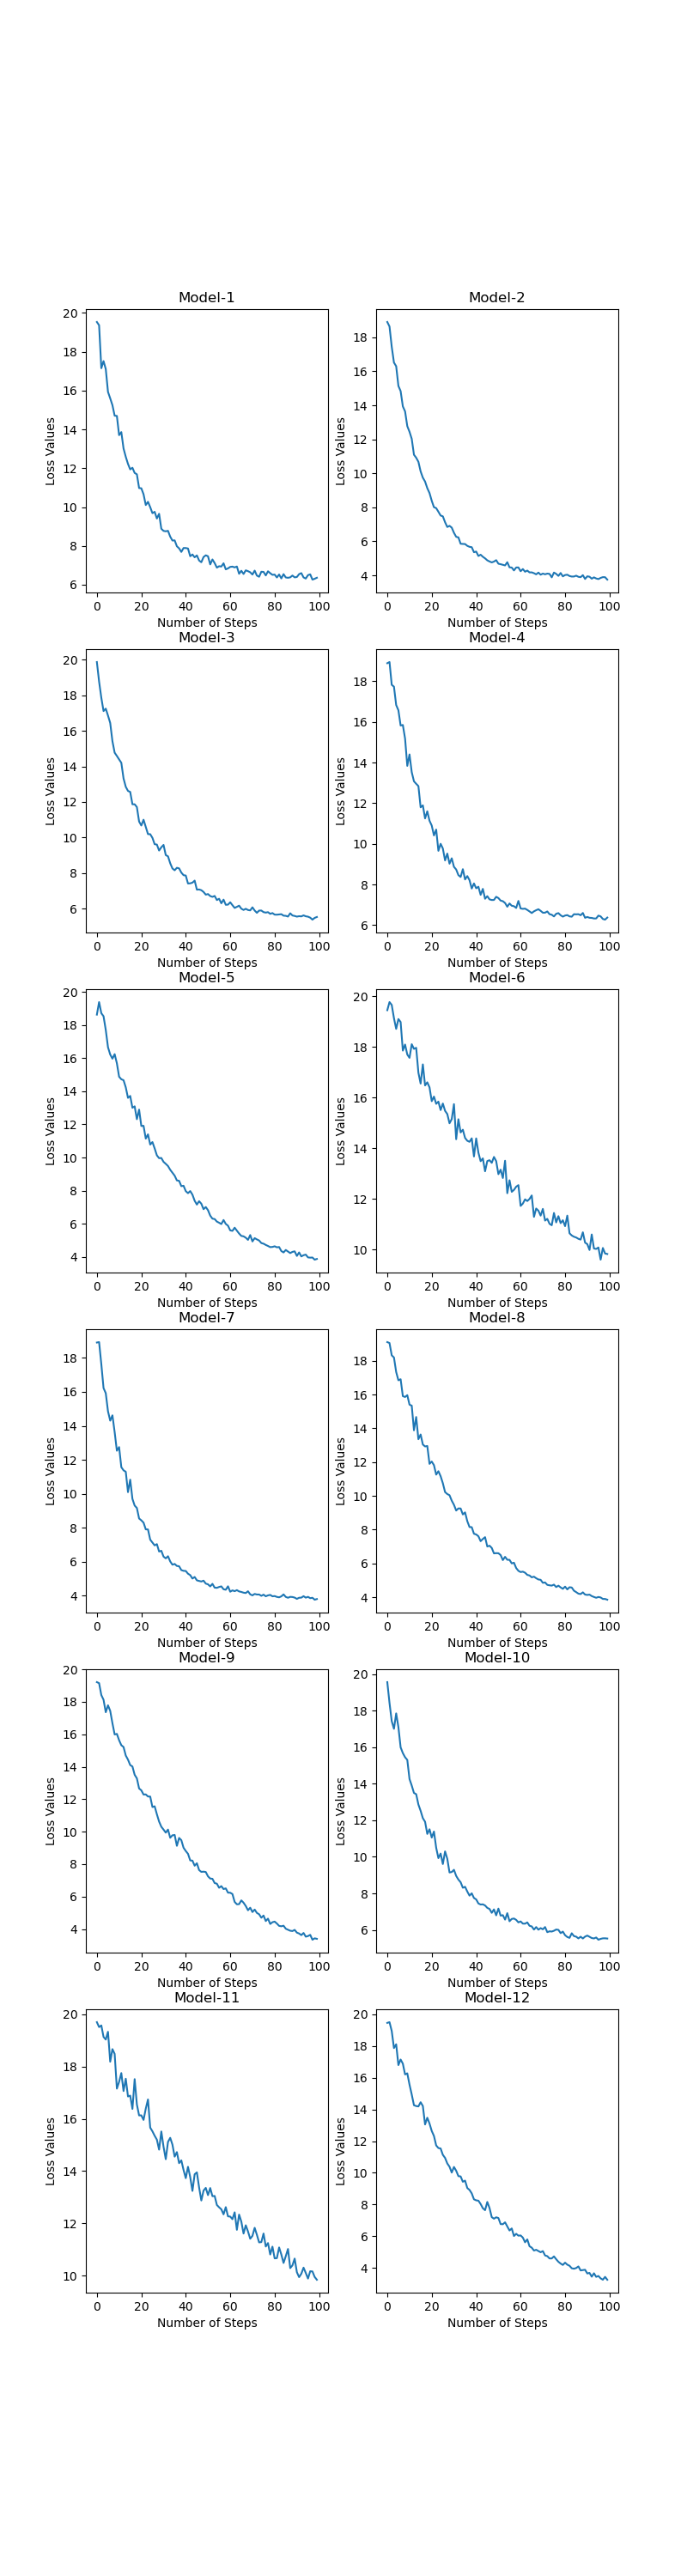

In [4]:
comb = list(permutations(list(range(4)), 2))
fig = plt.figure(figsize=[8, 30])
models = {}
for i, v in enumerate(comb):
    lr = LinearRegression().fit(train_split[:, v], train_y_split)
    models["model_"+str(i+1)]= lr
    ax = fig.add_subplot(6, 2, i + 1)
    ax.plot(np.arange(100),lr.cost_list)
    ax.set_xlabel('Number of Steps')
    ax.set_ylabel('Loss Values')
    ax.set_title("Model-{}".format(i+1));

# Testing the models

In [5]:
for i, v in enumerate(comb):
    for name, model in models.items():
        pred_val = model.predict(test_split[:,v])
        error = model.lst_sq(pred_val,test_y_split)
        print('{}[{},{}] -> {}'.format(name,feature_names[v[0]],feature_names[v[1]],error))
    print('*'*100)

model_1[sepal length (cm),sepal width (cm)] -> 4.734022283096011
model_2[sepal length (cm),sepal width (cm)] -> 5.1927570084361365
model_3[sepal length (cm),sepal width (cm)] -> 4.696700617784921
model_4[sepal length (cm),sepal width (cm)] -> 6.259444228573846
model_5[sepal length (cm),sepal width (cm)] -> 5.601071420653005
model_6[sepal length (cm),sepal width (cm)] -> 4.975602405340578
model_7[sepal length (cm),sepal width (cm)] -> 5.092756032018945
model_8[sepal length (cm),sepal width (cm)] -> 4.989324178703755
model_9[sepal length (cm),sepal width (cm)] -> 4.949387493194265
model_10[sepal length (cm),sepal width (cm)] -> 6.001594855564335
model_11[sepal length (cm),sepal width (cm)] -> 5.456508414732248
model_12[sepal length (cm),sepal width (cm)] -> 5.739157333971219
****************************************************************************************************
model_1[sepal length (cm),petal length (cm)] -> 3.6153372240146333
model_2[sepal length (cm),petal length (cm)] -> 

# L2 Regularization


In [6]:
model_without_regularization = LinearRegression().fit(train_split[:, (0,1)], train_y_split)
predicted_val = model_without_regularization.predict(test_split[:,(0,1)])
mse = model_without_regularization.lst_sq(predicted_val,test_y_split)
print("weights = {}".format(model_without_regularization.w))
print('loss without regularization -> {}'.format(mse))

weights = [0.13561033 0.04717881]
loss without regularization -> 4.783750803863645


In [7]:
model_with_regularization = LinearRegression().fit(train_split[:, (0,1)], train_y_split, regularization=0.8)
predicted_val = model_with_regularization.predict(test_split[:,(0,1)])
mse = model_with_regularization.lst_sq(predicted_val,test_y_split)
print("weights = {}".format(model_with_regularization.w))
print('loss with regularization -> {}'.format(mse))

weights = [0.13631968 0.04813122]
loss with regularization -> 4.774785938965682
